<a href="https://colab.research.google.com/github/thefinancetutor/python-tutorial-colab/blob/main/Lecture_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PYTHON REVIEW**

**Functions**

In [1]:
def f(x):
  a = x + 3
  b = a * 4
  return b * b

In [2]:
f(60)

63504

**Plotting**

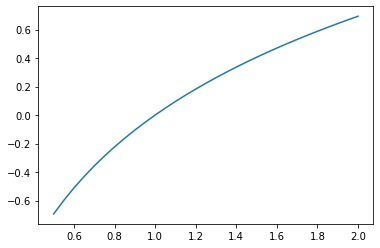

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 2.05, 0.05)
plt.plot(x, np.log(x))
plt.show()

The exponential function often used in finance (e.g. continuous compounding). It is written as $e^x$ or $\exp(x)$.

In [5]:
def g(x):
  return np.exp(x)

In [6]:
g(2)

7.38905609893065

Let's create a function that does the following: $$ e^{x^{2}} $$

In [7]:
def h(x):
  return np.exp(x**2)

In [13]:
h(2)

54.598150033144236

This is not the same as $e^{2x}$.


In [9]:
def i(x):
  return np.exp(2*x)

In [14]:
i(2)

54.598150033144236

I thought you said it wasn't the same?

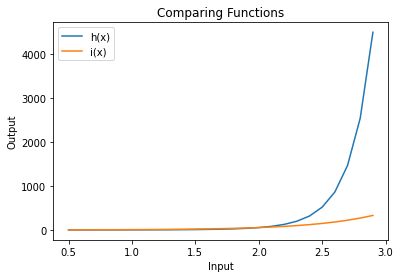

In [19]:
x = np.arange(0.5, 3.00, 0.1)
plt.plot(x, h(x),label="h(x)")
plt.plot(x, i(x),label="i(x)")
plt.legend()
plt.title('Comparing Functions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

**Simulation**


In [20]:
np.std(np.random.normal(100, 10, size=1000))

10.051897871749333

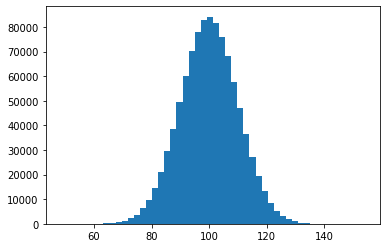

In [21]:
plt.hist(np.random.normal(100, 10, size=1000000), bins=50)
plt.show()

**Linear Regression**

In [23]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 36.1 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=8f2c9832352dd7a806332382e7cd79465e1330c546810dbe1d2f6cd50039b1f9
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [39]:
import yfinance as yf
import statsmodels.tools
#import datetime
from pandas_datareader import data as pdr
from statsmodels.api import OLS

yf.pdr_override()
mret = pdr.get_data_yahoo(['TSLA', 'SPY'])['Adj Close'].resample('M').ffill().pct_change()
mret_c = statsmodels.tools.tools.add_constant(mret, prepend=True)


[*********************100%***********************]  2 of 2 completed


In [42]:
results = OLS(mret_c['TSLA'],mret_c[['const','SPY']],missing='drop').fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   TSLA   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     12.91
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           0.000460
Time:                        02:32:52   Log-Likelihood:                 45.163
No. Observations:                 134   AIC:                            -86.33
Df Residuals:                     132   BIC:                            -80.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0333      0.016      2.096      0.0

Let's draw the regression line

In [33]:
results.params

SPY    1.661199
dtype: float64

In [43]:
b = results.params['const']
m = results.params['SPY']
x = np.array([mret.SPY.min(), mret.SPY.max()])
y = b + m * x

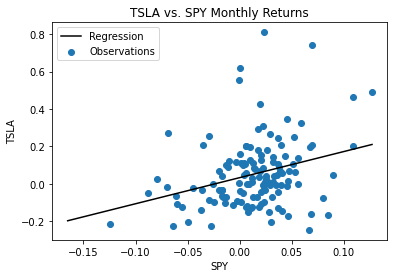

In [44]:
plt.scatter(mret_c.SPY, mret_c.TSLA, label='Observations')
plt.title('TSLA vs. SPY Monthly Returns')
plt.xlabel('SPY')
plt.ylabel('TSLA')
plt.plot(x, y, color='k', label='Regression')
plt.legend()
plt.show()

**Matrices**

In [45]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8])
b = np.array([[1, 2, 3, 4, 5, 6, 7, 8], [8, 7, 6, 5, 4, 3, 2, 1]])
c = np.array([1, 2])

In [46]:
b@a

array([204, 120])

In [47]:
c@b

array([17, 16, 15, 14, 13, 12, 11, 10])

In [48]:
c@b@a

444